In [34]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import pandas_profiling
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [38]:
# Load Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
df = pd.read_csv(url, names=names)

In [39]:
pandas_profiling.ProfileReport(df)

Number of variables,11
Number of observations,699
Total Missing (%),0.0%
Total size in memory,60.1 KiB
Average record size in memory,88.1 B
Numeric,8
Categorical,1
Boolean,1
Date,0
Text (Unique),0
Rejected,1


In [40]:
df.describe()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [41]:
df = df.drop('id', axis = 1)

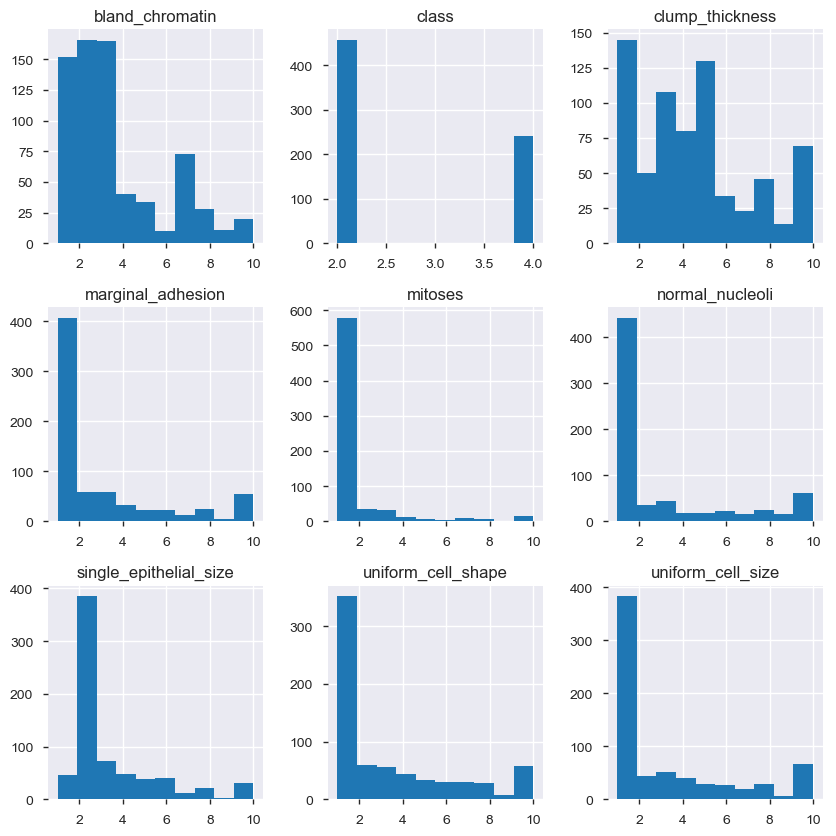

In [42]:
df.hist(figsize = (10, 10));
plt.show()

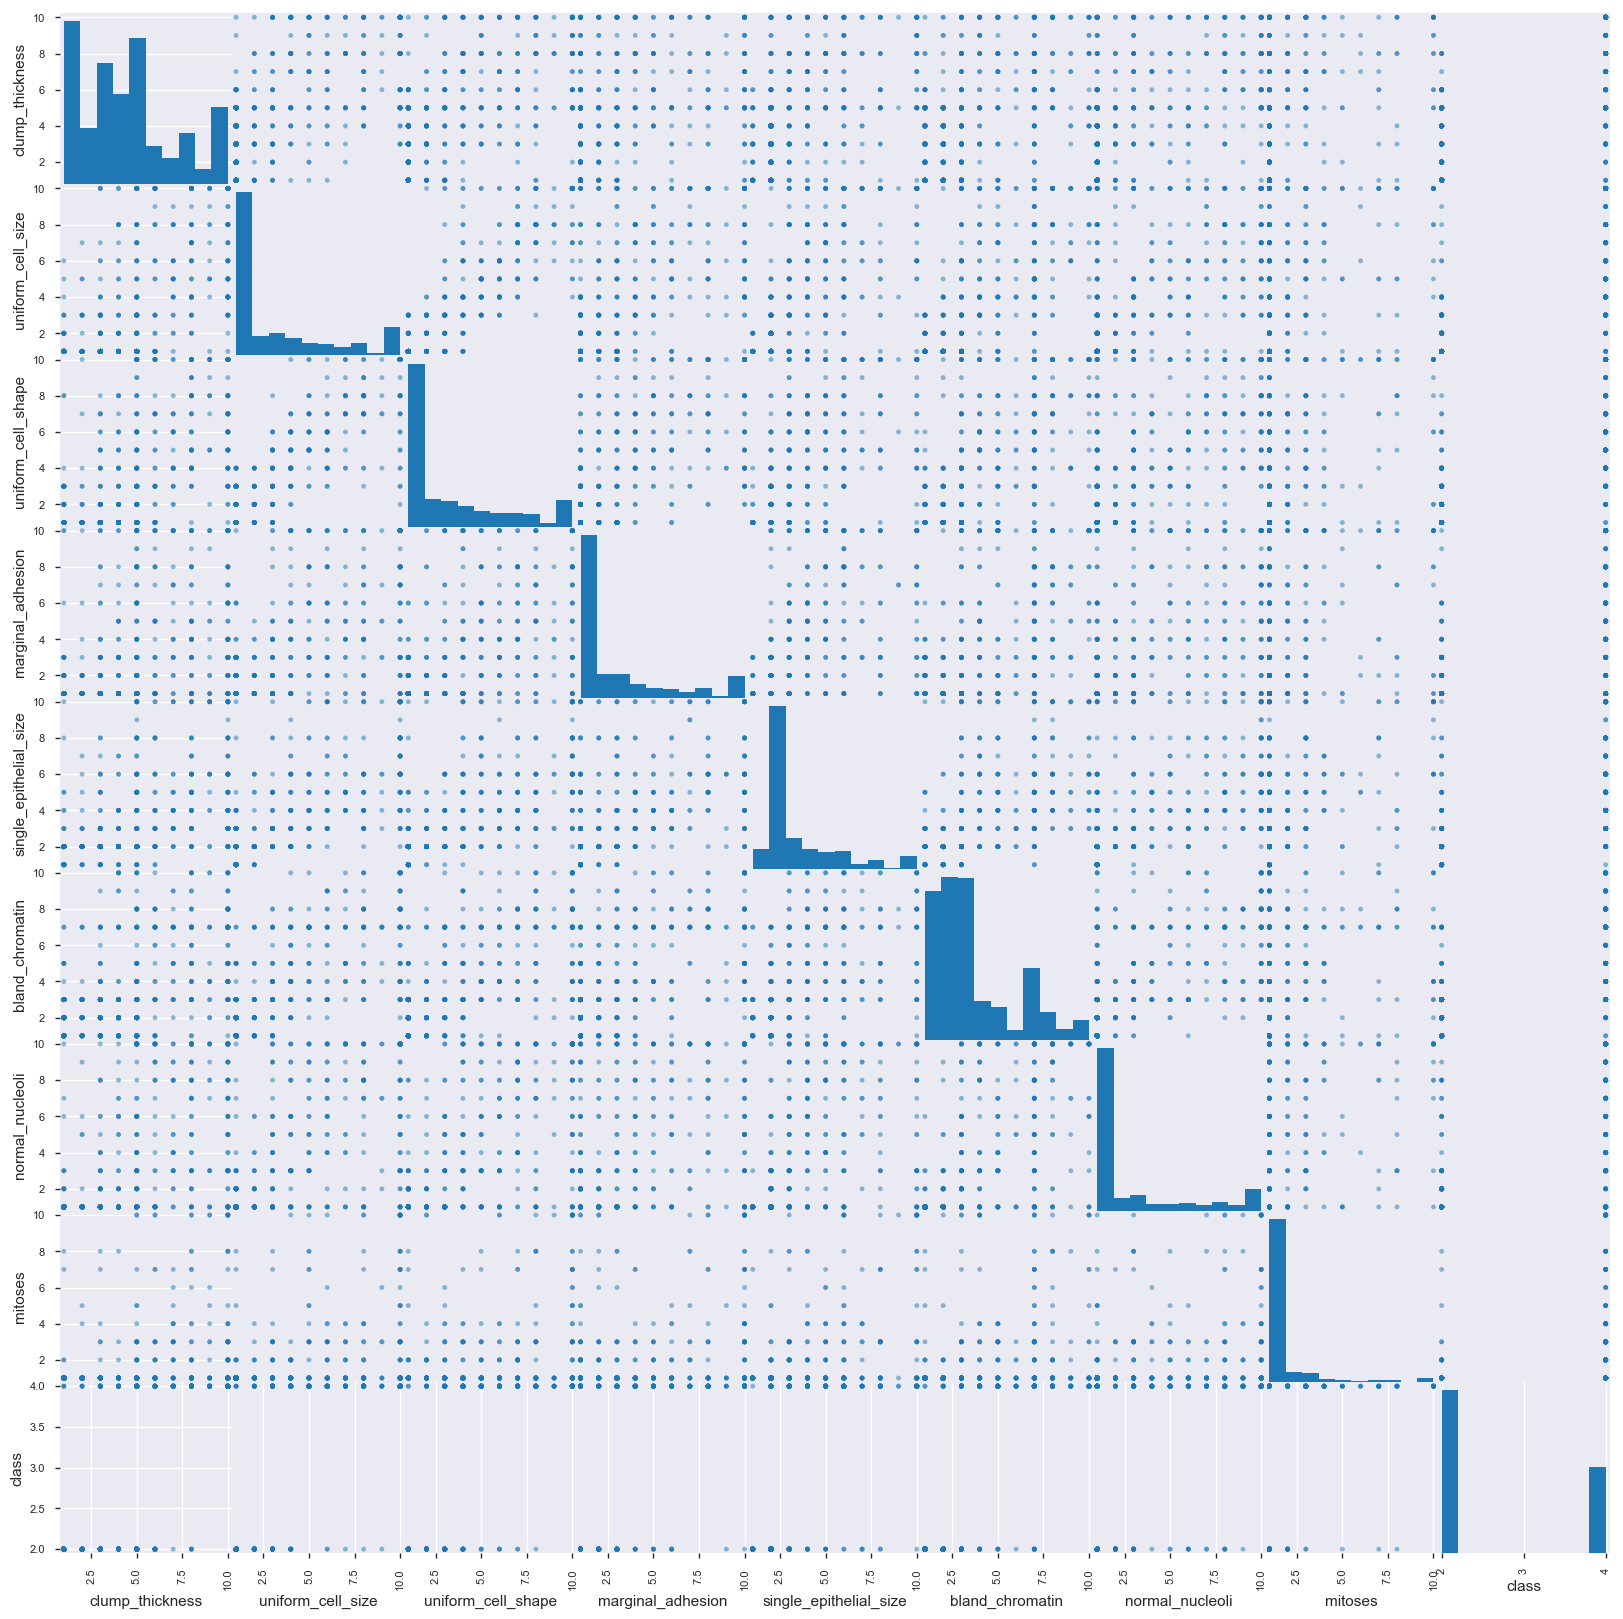

In [17]:
scatter_matrix(df, figsize = (20 ,20));
plt.show()

In [48]:
for col in df:
    print(df[col].unique())

[ 5  3  6  4  8  1  2  7 10  9]
[ 1  4  8 10  2  3  7  5  6  9]
[ 1  4  8 10  2  3  5  6  7  9]
[ 1  5  3  8 10  4  6  2  9  7]
[ 2  7  3  1  6  4  5  8 10  9]
['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']
[ 3  9  1  2  4  5  7  8  6 10]
[ 1  2  7  4  5  3 10  6  9  8]
[ 1  5  4  2  3  7 10  8  6]
[2 4]


In [50]:
df['bare_nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [51]:
df.replace('?',-99999, inplace=True)

In [52]:
X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

In [53]:
# testing parameters
seed = 42
scoring = 'accuracy'

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = seed)

In [55]:
results = []
models = []
names = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))

In [58]:
for name, model in models:
    kfold = StratifiedKFold(n_splits = 10, random_state = seed)
    cv_results = cross_val_score(model ,X_train, y_train, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    print(name)
    print('CV_MEAN: ')
    print(cv_results.mean())
    print('CV_STD: ')
    print(cv_results.std())

KNN
CV_MEAN: 
0.9695573294629899
CV_STD: 
0.021005825371030837
SVM
CV_MEAN: 
0.9560595065312046
CV_STD: 
0.02707388061964769


In [59]:
for name, models in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

KNN
0.9542857142857143
              precision    recall  f1-score   support

           2       1.00      0.93      0.96       118
           4       0.88      1.00      0.93        57

   micro avg       0.95      0.95      0.95       175
   macro avg       0.94      0.97      0.95       175
weighted avg       0.96      0.95      0.95       175

SVM
0.9542857142857143
              precision    recall  f1-score   support

           2       1.00      0.93      0.96       118
           4       0.88      1.00      0.93        57

   micro avg       0.95      0.95      0.95       175
   macro avg       0.94      0.97      0.95       175
weighted avg       0.96      0.95      0.95       175

